In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145) 
  
# data (as pandas dataframes) 
X = np.array(statlog_heart.data.features)
y = np.array(statlog_heart.data.targets)
statlog_df = np.concatenate((X, y), axis = 1)
df_statlog = pd.DataFrame(statlog_df)
df_statlog.rename(columns = {0 : 'age', 1 : 'sex', 2 : 'chest-pain', 3 : 'rest-bp', 4 : 'serum-chol',5 : 'fasting-blood-sugar', 6 : 'electrocardiographic', 7 : 'max-heart-rate', 8 : 'angina', 9 : 'oldpeak',10 : 'slope', 11 : 'major-vessels', 12 : 'thal', 13 : 'heart-disease'}, inplace = True)
df_statlog['heart-disease'] = df_statlog['heart-disease'].replace({2.0 : 1, 1.0 : 0})
df_statlog

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,heart-disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0.0


In [20]:
df_statlog.isna().sum()

age                     0
sex                     0
chest-pain              0
rest-bp                 0
serum-chol              0
fasting-blood-sugar     0
electrocardiographic    0
max-heart-rate          0
angina                  0
oldpeak                 0
slope                   0
major-vessels           0
thal                    0
heart-disease           0
dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values1 = scaler.fit_transform(df_statlog[['rest-bp']])
scaled_values2 = scaler.fit_transform(df_statlog[['serum-chol']])
scaled_values3 = scaler.fit_transform(df_statlog[['max-heart-rate']])
df_statlog['rest-bp'] = scaled_values1
df_statlog['serum-chol'] = scaled_values2
df_statlog['max-heart-rate'] = scaled_values3
df_statlog

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,heart-disease
0,70.0,1.0,4.0,0.339623,0.447489,0.0,2.0,0.290076,0.0,2.4,2.0,3.0,3.0,1.0
1,67.0,0.0,3.0,0.198113,1.000000,0.0,2.0,0.679389,0.0,1.6,2.0,0.0,7.0,0.0
2,57.0,1.0,2.0,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.3,1.0,0.0,7.0,1.0
3,64.0,1.0,4.0,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.2,2.0,1.0,7.0,0.0
4,74.0,0.0,2.0,0.245283,0.326484,0.0,2.0,0.381679,1.0,0.2,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.5,1.0,0.0,7.0,0.0
266,44.0,1.0,2.0,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.0,1.0,0.0,7.0,0.0
267,56.0,0.0,2.0,0.433962,0.383562,0.0,2.0,0.625954,0.0,1.3,2.0,0.0,3.0,0.0
268,57.0,1.0,4.0,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.4,2.0,0.0,6.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_statlog.iloc[ :, 0 : 13], df_statlog.iloc[ :, 13], random_state = 0, train_size = 0.7)

In [23]:
def train_perceptron(x_inp : np.array, yi : np.array, learn_rate : float, tol : float, max_epochs : int, control_var : bool): # Fazendo o treinamento do perceptron.
    try : # Caso eu tenha algum problema com as colunas do meu programa...
        n_rows = x_inp.shape[0]
        n_cols = x_inp.shape[1]
    except Exception as error:
        if error == "IndexError":
            print("Now, you don't have cols, so we will change it...\n")
            n_cols = 1
        else:
            print(f"The error {error} is hapenning \n")
            print("Breaking the program...")
            sys.exit()
    finally:
        if control_var == True: # control_var é 1 variável de controla que controlará quando usarei um certo threshold...
            w = (np.random.uniform(size = n_cols + 1) - 0.5) # Inicializando o pesos com o tamanho n_cols + 1.
            ones = np.ones((n_rows, 1))
            x_inp = np.concatenate((x_inp, ones), axis = 1) # Apenas colocando as colunas no vetor de entrada.
        else:
            w = (np.random.uniform(size = n_cols) - 0.5)
        n_epochs = 0
        err_epoch = tol + 1
        lst_errors = np.zeros((max_epochs))
        lst_outs = np.zeros((n_rows))
        aux = 0
        while ((n_epochs < max_epochs) and (err_epoch > tol)):
            error_grad = 0
            rand_order = np.random.permutation(n_rows)
            for i in range(n_rows):
                # Escolhendo uma entrada aleatória.
                i_rand = rand_order[i]
                x_val = x_inp[i_rand, :]
                y_hat = 1 if np.dot(x_val, w) >= 0 else 0 # A saída separadora do perceptron.
                err = (yi[i_rand] - y_hat)
                dw = (learn_rate*err*x_inp[i_rand, :])
                w = w + dw # Atualização de pesos.
                if n_epochs == max_epochs - 1:
                    lst_outs[aux] = y_hat
                    aux += 1
                error_grad = error_grad + (err**2)
            lst_errors[n_epochs] = error_grad / n_rows 
            n_epochs += 1
    return (w, lst_errors, lst_outs)

def yperceptron(x_input : np.array, w : np.array, control_var : bool):
    try : 
        n_rows = x_input.shape[0]
        n_cols = x_input.shape[1]
    except Exception as error:
        print(f"The error {error} is happening ...")
        n_cols = 1
        x_input = x_input.reshape(-1, 1)
    if control_var == True:
        ones = np.ones((n_rows, 1))
        x_input = np.concatenate((x_input, ones), axis = 1) # Apenas colocando as colunas no vetor de entrada.
    u = np.dot(x_input, w)
    
    y = np.where(u >= 0, 1, 0) # Compara elemento a elemento com 0, retorna 1 caso maior e 0 caso menor.
    return y   

In [24]:
from sklearn.metrics import accuracy_score
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
mean_acc = 0
lst_of_results = list()
for i in range(10):
    lst_return = train_perceptron(X_train, y_train, 0.01, 0.1, 100, True)
    w = lst_return[0]
    y_hat_test = yperceptron(X_test, w, True)
    lst_of_results.append(accuracy_score(y_test, y_hat_test))
    mean_acc += accuracy_score(y_test, y_hat_test)
mean_acc = (mean_acc / 10)
lst_of_results = np.array(lst_of_results)
stand_dev = 0
for i in range(10):
    stand_dev = (lst_of_results[i] - mean_acc) ** 2
stand_dev = stand_dev / lst_of_results.shape[0]

In [25]:
print(f'A acurácia média para 10 amostras é : {mean_acc * 100}% +- {stand_dev}')

A acurácia média para 10 amostras é : 78.64197530864197% +- 0.00028181679622008785


In [26]:
y_hat_train = yperceptron(X_train, w, True)
y_hat_train = np.array(y_hat_train)

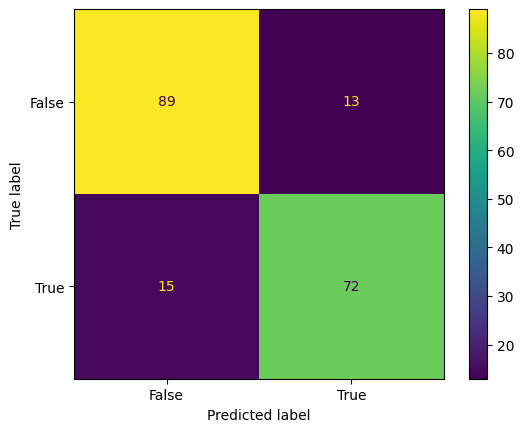

In [27]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, y_hat_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

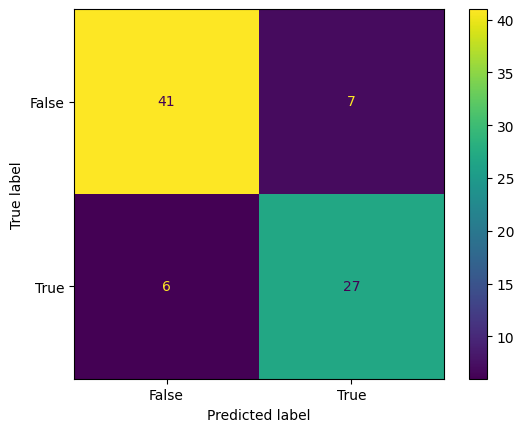

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()